In [9]:
import sys
from IPython.display import IFrame
sys.path.append('../')


# *হাবল এবং DESI এর উপাখ্যান*

In [10]:
%matplotlib inline

১৯২৯ সালটি আমাদের কাছে এনেছিল অস্কার, প্রথম গাড়ির রেডিও এবং এডউইন হাবলের অপ্রত্যাশিত পর্যবেক্ষণ যে সমস্ত ছায়াপথগুলি (galaxies) আমাদের থেকে দূরে সরে যাচ্ছে!

![title](../desihigh/images/edwin-hubble.jpg)

আসুন আমরা হাবলের এমন দুটি ছায়াপথকে এক ঝলক দেখে নেই, ত্রিকোণ (Triangulum) এবং বৃহৎ ম্যাজেলানিক মেঘ (Large Magellanic Cloud)।

![title](../desihigh/images/Triangulum.jpg)
![title](../desihigh/images/LMC.jpg)

হাবল আমাদের থেকে সর্বমোট ২৪টি ছায়াপথের দূরত্ব ও তাদের `লালসরণ'(redshift) মেপে ছিলেন। কিন্তু এর অর্থ কী?

হতে পারে আপনি ইতিমধ্যে জানেন যে হাইড্রোজেনের শক্তির স্তরগুলি __কোয়ান্টাইত__ (quantized), অর্থাৎ স্তরগুলোর শক্তির পরিমাণ নির্দিষ্ট, এবং ইলেক্ট্রনগুলো __বিচ্ছিন্ন__ (discrete) খোলে (shell) বাস করে যেগুলোর শক্তির পরিমাণ নির্দিষ্ট করা। ইলেক্ট্রনগুলো যখন এক স্তর থেকে অন্য আরেক স্তরে স্থানান্তারিত হয়, তখন তা থেকে আলোককণা নির্গত হয় এবং তার তরঙ্গদৈর্ঘ্য আমরা "রাইডবার্গ" এর সূত্র ব্যাবহার করে পেতে পারিঃ

$$
\lambda_{\rm vac} = 1.096 \times 10^{7} \left ( \frac{1}{n^2} - \frac{1}{m^2} \right ) 
$$

যেখানে $n$ ও $m$ দুটি শক্তির স্তরকে চিহ্নিত করে। তারা $[0, 1, 2, ... \infty]$ এর মধ্যে যেকোনো মান নিতে পারে।

In [18]:
# First, let's import some useful packages:
import astropy
import pylab           as     pl
import pandas          as     pd
import numpy           as     np

from   matplotlib      import pyplot as plt
from   scipy           import stats
from   IPython.display import Image
from   tools.wave2rgb  import wavelength_to_rgb
from   pkg_resources   import resource_filename

In [19]:
def Rydberg(n, m):
    # Vacuum wavelengths [nanometres]
    result = 1.096e-2 * (1. / n / n - 1. / m / m)
    return 1. / result

আসুন আমরা হাইড্রোজেন নির্গত করতে পারে এমন আলোর তরঙ্গদৈর্ঘ্যের হিসেবটা করে ফেলি

In [20]:
waves = []

print('n \t m \t Wavelength [nm]')

for n in np.arange(1, 10, 1):
    for m in np.arange(n+1, 10, 1):
        wave = Rydberg(n, m)        
        waves.append(wave)
        
        print('{:d} \t {:d} \t {:.3f}'.format(n, m, wave))

n 	 m 	 Wavelength [nm]
1 	 2 	 121.655
1 	 3 	 102.646
1 	 4 	 97.324
1 	 5 	 95.043
1 	 6 	 93.848
1 	 7 	 93.142
1 	 8 	 92.689
1 	 9 	 92.381
2 	 3 	 656.934
2 	 4 	 486.618
2 	 5 	 434.480
2 	 6 	 410.584
2 	 7 	 397.405
2 	 8 	 389.294
2 	 9 	 383.923
3 	 4 	 1876.955
3 	 5 	 1283.075
3 	 6 	 1094.891
3 	 7 	 1005.931
3 	 8 	 955.541
3 	 9 	 923.814
4 	 5 	 4055.150
4 	 6 	 2627.737
4 	 7 	 2167.662
4 	 8 	 1946.472
4 	 9 	 1819.203
5 	 6 	 7465.163
5 	 7 	 4657.086
5 	 8 	 3743.215
5 	 9 	 3299.335
6 	 7 	 12380.685
6 	 8 	 7507.821
6 	 9 	 5912.409
7 	 8 	 19075.426
7 	 9 	 11316.720
8 	 9 	 27823.100


এখন আসুন আমরা তরঙ্গদৈর্ঘ্যগুলির লেখচিত্র তৈরি করি ও এই তরঙ্গদৈর্ঘ্যগুলির রঙ পর্যবেক্ষণ করি। যদি আমরা নির্গত হাইড্রোজেন পরমাণুর দিকে তাকাতাম, তবে আমরা এই রঙগুলোই দেখতে পেতামঃ

(380.0, 780.0)

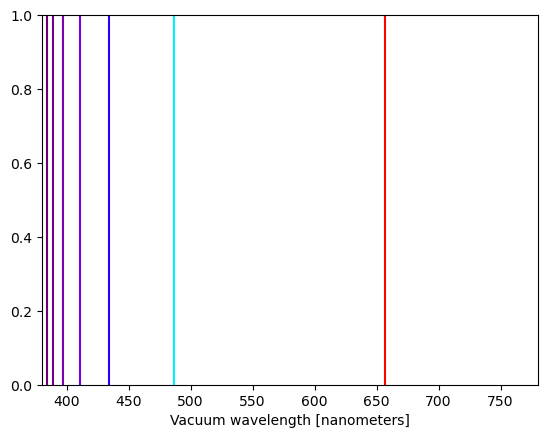

In [21]:
for wave in waves:
  # color = [r, g, b]
  color = wavelength_to_rgb(wave)       
  pl.axvline(x=wave, c=color)

pl.xlabel('Vacuum wavelength [nanometers]')
pl.xlim(380., 780.)

যদি হাইড্রোজেন একটি চলমান ছায়াপথের মধ্যে উপস্থিত থাকে তবে আমরা দেখব যে উপরের চিহ্নিত তরঙ্গদৈর্ঘ্যগুলি ডপলার স্থানান্তরিত (Doppler shifted) হয়েছে। আমরা এটিকে ছায়াপথটির "লালসরণ" বলব, যেটি সাধারণত ইংরেজি $z$ (https://en.wikedia.org/wiki/Redshift) চলক (variable) দ্বারা চিহ্নিত হয়ে থাকে। আসুন ধরা যাক যে এই ছায়াপথটি আলোর গতির ১% গতিতে চলছে (v = 0.1 * c)। আমরা নীচের সমীকরণের মাধ্যমে তার লালসরণ গণনা করতে পারি: 

$$
1 + z = \sqrt{\frac{1 + v/c}{1 - v/c}}
$$

In [22]:
def redshift(v):
    # v [speed of light].
    result = (1. + v) / (1. - v) 
    result = np.sqrt(result) - 1.
    
    return  result

(380.0, 780.0)

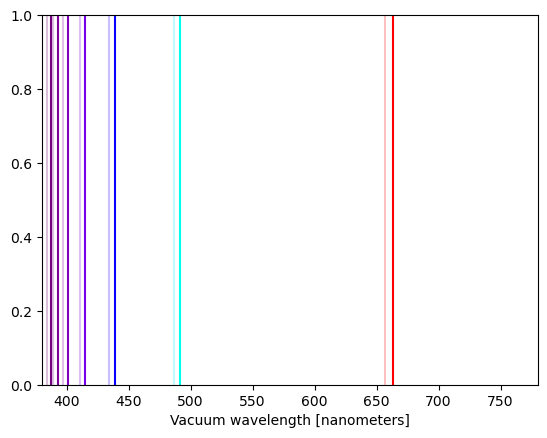

In [23]:
zz = redshift(0.01) 

for restwave in waves:
  obswave = (1. + zz) * restwave     

  color   = wavelength_to_rgb(restwave)       
  pl.axvline(x=restwave, c=color, alpha=0.25)

  color   = wavelength_to_rgb(obswave)       
  pl.axvline(x=obswave, c=color)

pl.xlabel('Vacuum wavelength [nanometers]')
pl.xlim(380., 780.)

উপরে আমরা দেখতে পাচ্ছি হাইড্রোজেনের মূল তরঙ্গরেখাগুলি (স্বচ্ছ রঙ) এবং একই রেখাগুলি যখন তারা একটি চলমান ছায়াপথ এর হাইড্রোজেন থেকে নির্গত হচ্ছে (গাঢ় রঙ)। এই বিষয়ে আরও বিশদ জানতে চাইলে আপনি https://en.wikedia.org/wiki/Doppler_effect সাইটটি পড়তে পারেন।

হাবল হাইড্রোজেন এবং অন্যান্য অনেক মৌলের নির্দিষ্ট তরঙ্গরেখাগুলি জানতেন। তাই, উপরের লেখচিত্রের মতন তিনি স্বচ্ছ ও গাঢ় রঙের রেখাগুলির মধ্যে পার্থক্য মেপে তিনি অনেক ছায়াপথের বেগ নির্ণয় করতে সক্ষম হন। তিনি এইসব ছায়াপথগুলোর দূরত্ব মাপতে পেরেছিলেন (এজন্য তিনি এইসব ছায়াপথের মধ্যে অবস্থিত কিছু বিশেষ তারার উজ্জ্বলতা ব্যাবহার করেছিলেন - https://en.wikedia.org/wiki/Cepheid_variable) এবং একই সাথে তারা কত দ্রুত আমাদের থেকে সরে যাচ্ছে তাও মাপতে পেরেছিলেন (উপরের মতো তাদের লালসরণ থেকে):

In [31]:
hub = resource_filename('desihigh','dat/hubble.dat')
dat = pd.read_csv(hub, sep='\s+', comment='#', names=['Galaxy name', 'Distance [Mpc]', 'Velocity [km/s]'])
dat

,Galaxy name,Distance [Mpc],Velocity [km/s]
0,S.Mag,0.032,170
1,L.Mag,0.034,290
2,NGC6822,0.214,-130
3,NGC598,0.263,-70
4,NGC221,0.275,-185
5,NGC224,0.275,-220
6,NGC5457,0.450,200
7,NGC4736,0.500,290
8,NGC5194,0.500,270
9,NGC4449,0.630,200


এবার এসকল ছায়াপথগুলোর লেখচিত্র করা যাক। আমরা x-অক্ষে দূরত্ব ও y-অক্ষে তাদের গতির লেখচিত্র তৈরি করব। 

In [32]:
fig = plt.figure(figsize=(10, 7.5))
ax  = fig.add_subplot(1, 1, 1)
plt.close()

In [33]:
label_style = {'fontname': 'Georgia', 'fontsize': 16} 

In [34]:
ax.plot(dat['Distance [Mpc]'], dat['Velocity [km/s]'], '-', c='k', marker='*', lw=0)

ax.set_xlabel('Distance from us [Megaparsecs]', **label_style)
ax.set_ylabel('Recession velocity [km/s]', **label_style)

plt.tight_layout()

<Figure size 640x480 with 0 Axes>

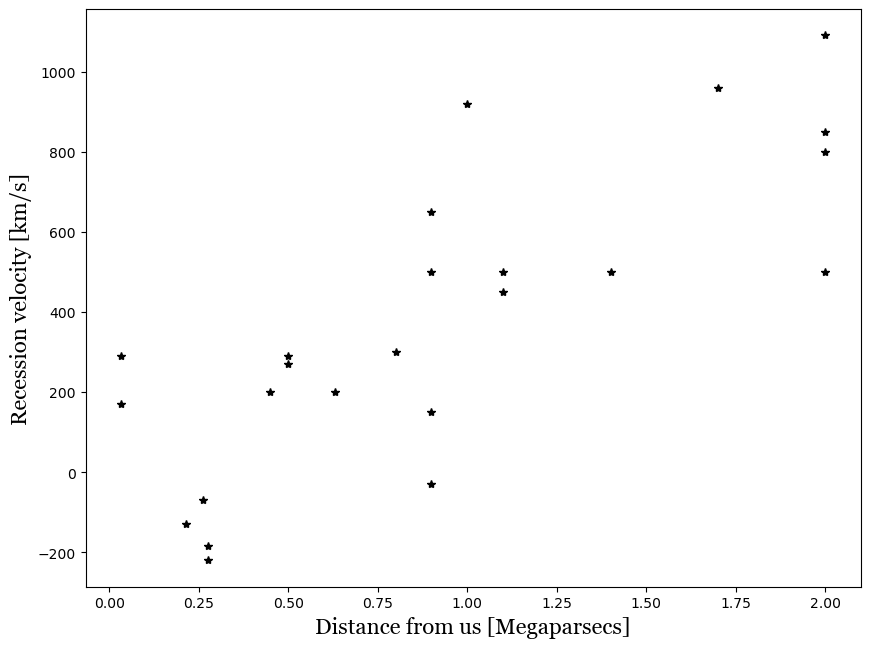

In [35]:
fig

এডউইন একটি স্পষ্ট সংশ্লেষ (correlation) দেখেছিলেন, তবে চলকগুলোর পরিমাপনের মধ্যে বেশ ত্রুটি (noise) ছিল। আমরা এখন এই দুটি চলকের (variable) মধ্যকার সম্পর্ক কী তা সম্পর্কে একটি শ্রেষ্ঠ মিলকরণ (best fit) বের করব। আমরা `scipy` প্যাকেজটি ব্যাবহার করে একটি রৈখিক নির্ভরণ (linear regression) প্রাক্কলন (estimate) করব:

In [36]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dat['Distance [Mpc]'],dat['Velocity [km/s]'])

In [37]:
print('The gradient to this trend is known as the Hubble constant:  {:.3f} [km/s/Mpc]'.format(slope))

The gradient to this trend is known as the Hubble constant:  454.158 [km/s/Mpc]


এই সংশ্লেষের নতিমাত্রা (gradient) কে হাবলের ধ্রুবক (Hubble constant) বলা হয়ে থাকে।

চলুন আমরা দেখি এটি কেমন দেখতে। 

In [38]:
distances  = np.linspace(-0.5, 2.5, 10)
velocities = slope * distances

ax.plot(distances, velocities, lw=0.25, c='k')
ax.set_xlim(0.0, 2.5)

(0.0, 2.5)

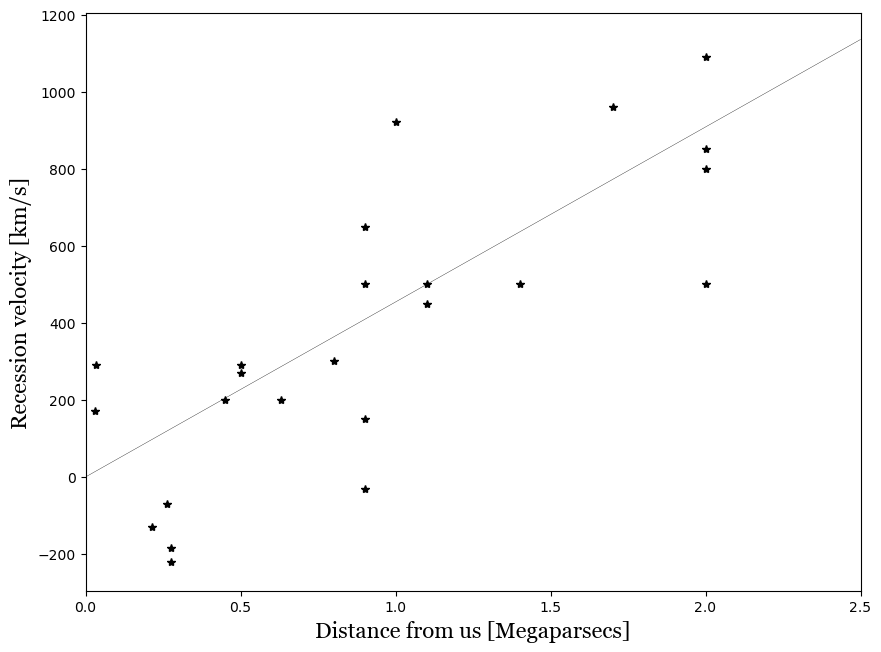

In [39]:
fig

দেখা যাচ্ছে যে মিলটি (fit) বেশ ভাল হয়েছে!

এখন আপনার পালা, আপনি কি বের করতে পারবেন হাবলের ধ্রুবকের পরিমাপনের বিচ্যুতি (error) কত? 
যদি আমরা একটি ছায়াপথের দূরত্ব জানি, তবে আমরা কতটুকু সঠিকভাবে পূর্বাভাস করতে পারি তার বেগ কত?

সুতরাং উপসংহারে, প্রতিটি সম্ভাব্য ছায়াপথ আমাদের থেকে দূরে চলে যাচ্ছে! আমরা এই তত্ত্বটি সকল ছায়াপথের ক্ষেত্রে সত্য বলে মনে করি। আমরা কোনওভাবেই কোন কিছুর অথবা মহাবিশ্বের কেন্দ্রে নই অথবা কোন বিশেষ জায়গায় নই বরং প্রতিটি ছায়াপথ একে অপরের থেকে দূরে চলে যাচ্ছে। মহাবিশ্বের সম্প্রসারণের বিষয়টি ১৯২৯ সালে অনেকের কাছে একটি ধাক্কা হিসাবে আসে, তবে এর চেয়েও বড় অবাক হওয়ার বিষয় তাদের জন্য ভবিষ্যতে অপেক্ষা করছিল। 

# *কৃষ্ণশক্তি*

১৯৯৮ সালে পৃথিবী চিরতরের জন্য পরিবর্তিত হল। ল্যারি পেজ এবং সের্গেই ব্রিন গুগল প্রতিষ্ঠা করলেন, আমেরিকার ইউনিটি নোড এবং রাশিয়ার জারিয়া মডিউলকে একত্রিত করে [আন্তর্জাতিক স্পেস স্টেশন](https://en.wikipedia.org/wiki/International_Space_Station) গঠিত হল, এবং লরেন্স বার্কলি ল্যাব এর বিজ্ঞানী সল পার্লমাটার, ব্রায়ান স্মিডট এবং অ্যাডাম রিস অকাট্যভাবে _কৃষ্ণশক্তি_ র অস্তিত্ব নিশ্চিত করলেন। নিচের ছবিতে সে সময়ের সলকে দেখা যাচ্ছে  এই ফলাফলগুলি দিয়ে কিছু তরুণ বার্কলি গবেষককে মুগ্ধ করতেঃ 

![title](../desihigh/images/perlmutter.png)

তাহলে সবাই কিসের দিকে তাকিয়ে ছিল? আমরাও এই উপাত্তের (data) দিকে এক নজর দেইঃ 

সল এবং তার দলটি বিভিন্ন ধরণের Ia সুপারনোভা (https://en.wikipedia.org/wiki/Type_Ia_supernova) এর লালসরণ ($z$) এবং কার্যকর উজ্জ্বলতার মাত্রা (effective magnitude) পরিমাপ করেছিলেন। 

In [41]:
perl    = resource_filename('desihigh', 'dat/perlmutter.txt')

dat     = pd.read_csv(perl, names=['z', 'Effective magnitude'], comment='#', sep='\s+')
toprint = dat[:10]
toprint

,z,Effective magnitude
0,0.458,23.11
1,0.354,22.38
2,0.425,22.13
3,0.374,21.72
4,0.420,22.55
5,0.372,22.26
6,0.378,22.58
7,0.453,23.17
8,0.465,23.33
9,0.498,23.71


একটি চিত্রলেখে এটি আরও সহজভাবে বোঝা যায়:

Text(0, 0.5, 'Effective magnitude')

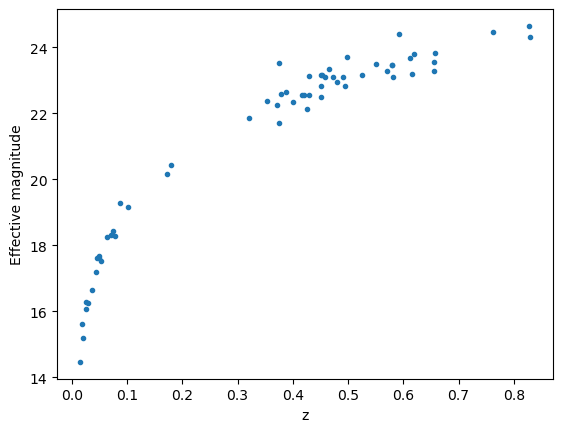

In [42]:
pl.plot(dat['z'], dat['Effective magnitude'], marker='.', lw=0.0)

pl.xlabel('z')
pl.ylabel('Effective magnitude')

সলের দৃঢ় বিশ্বাস ছিল, এবং তার উপযুক্ত কারণ ছিল, যে প্রতিটি  [Ia সুপারনোভা](https://en.wikedia.org/wiki/Type_Ia_supernova) এর প্রকৃত উজ্জ্বলতা (intrinsic brightness) একই। কিন্তু লালসরণ বেশি সুপারনোভাগুলোর আপাত উজ্জ্বলতা (apparent brightness), লালসরণ কম সুপারনোভাগুলোর থেকে কম, কারণ বেশি লালসরণ তারকাগুলোর দূরত্ব কম লালসরণ তারকাগুলো থেকে বেশি। এটি প্রদর্শিত সংশ্লেষকে (correlation) ব্যাখ্যা করে। আমাদের এক্ষেত্রে জেনে রাখা দরকার যে 'কার্যকর উজ্জ্বলতার মাত্রা' হল একটি খটমটে পরিমাপ ব্যাবস্থা যার মাধ্যমে জ্যোতির্বিদরা সাধারণত যে কোন কিছুর উজ্জ্বলতা প্রকাশ করে থাকেন। 

এই পরিমাপ সম্পর্কে যা আমাদের জানা দরকারি -- কোন প্রদত্ত লালসরণের জন্য একটি সুপারনোভা বা গ্যালাক্সি কতটা দূরে রয়েছে তা কয়েকটি পরামিতির (parameter) উপর নির্ভর করে, যার মধ্যে একটি হল মহাবিশ্বে কতটুকু কৃষ্ণশক্তি আছে। সল যখন এই গবেষণাটি করছিলেন, তখন প্রায় সকলেই প্রত্যাশা করছিলেন যে এই গবেষণার ফল দেখাবে যে _কৃষ্ণশক্তি বলে কিছুই নেই_, কিন্তু কয়েক জন অন্যথা অনুমান করেছিলেন।

হাবল যখন সম্প্রসারণটি আবিষ্কার করলেন, তখন এর ফলস্বরূপ অনেকেই ভেবেছিলেন যে স্থিতিভরশক্তি (rest mass-energy) এর ঘনত্বের পরিমাণ সময়ের সাথে কমে যাবে।  এক্ষেত্রে কৃষ্ণশক্তির অস্তিত্ব অনেকটাই ভূতুড়ে হবে, কারণ, কৃষ্ণশক্তির কারণে শক্তির ঘনত্বের পরিমাণ সময়ের সাথে অপরিবর্তিত থাকবে এবং এর অস্তিত্বের ব্যাখ্যা শুধুমাত্র [কোয়ান্টাম মেকানিক্স](https://en.wikedia.org/wiki/Quantum_mechanics) দ্বারাই সম্ভব। এই কৃষ্ণশক্তিই ছায়াপথগুলোকে একে অপর থেকে পৃথক করবে।

তবে আসুন আমরা সলের উপাত্ত ব্যবহার করে মহাবিশ্বে কৃষ্ণশক্তির পরিমাণ কত তা নির্ধারণ করি। প্রথমত, আমাদের একটি প্রতিরূপ (model) দরকার যার মাধ্যমে আমরা হিসেব করতে পারব যে যদি আমাদের একটি সুপারনোভার লালসরণ এবং মহাবিশ্বের কৃষ্ণশক্তির পরিমাণ জানা থাকে, তবে সেই সুপারনোভার (উজ্জ্বলতা) দূরত্ব (luminosity distance) কত।  মহাবিশ্বের সব ভরশক্তির মধ্যে কৃষ্ণশক্তির ভগ্নাংশ কত, তা বোঝাতে আমরা $\Omega_\Lambda$ চিহ্নটি ব্যাবহার করব। জেনে রাখা ভাল যে এই $\Lambda$ চিহ্নটি এসেছে আইনস্টাইনের সাধারণ আপেক্ষিতাবাদ (General Relativity) থেকে।

In [43]:
from astropy.cosmology import FlatLambdaCDM

def lumdist(z, olambda):
  cosmo = FlatLambdaCDM(H0=70, Om0=1. - olambda, Tcmb0=2.725)
    
  return  cosmo.luminosity_distance(z)   

আমরা এখন এই দূরত্বকে উজ্জ্বলতায় প্রকাশ করব, যেভাবে জ্যোতির্বিদরা সাধারণত করে থাকেন:

In [44]:
def effmag(z, olambda, MB):
  DL = lumdist(z, olambda)   

  return MB + 5. * np.log10(DL.value)    

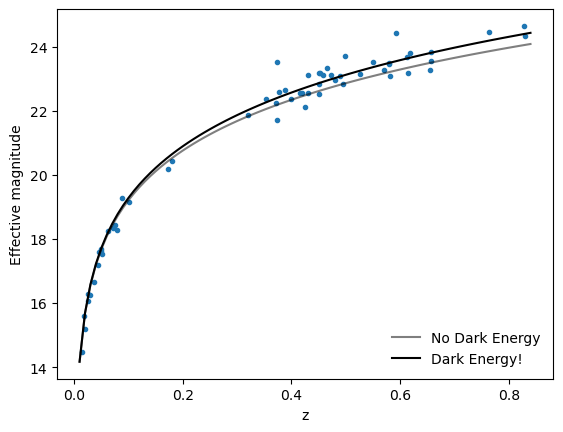

In [45]:
zs = np.arange(0.01, 0.85, 0.01)

pl.plot(dat['z'], dat['Effective magnitude'], marker='.', lw=0.0)

pl.plot(zs, effmag(zs, 0.0, 6.), c='k', label='No Dark Energy', alpha=0.5)
pl.plot(zs, effmag(zs, 0.5, 6.), c='k', label='Dark Energy!')

pl.xlabel('z')
pl.ylabel('Effective magnitude')

pl.legend(loc=4, frameon=False)

শুধু চোখ দিয়ে দেখেই আমরা বলতে পারি যে আমাদের উপাত্ত কৃষ্ণশক্তি প্রতিরূপের (model) সাথে বেশি সামঞ্জস্যপূর্ণ। তবে আমরা আরও বুঝতে পারি যে কৃষ্ণশক্তির পরিমাণ বেশি নেই। আসুন আমরা বোঝার চেষ্টা করি আমাদের উপাত্ত আমাদের কি বলতে ছাইছে।
আমাদের তত্ত্ব (theory) উপাত্তের সাথে কতটুকু সামঞ্জস্যপূর্ণ তা মাপার জন্য আমরা [ন্যূনতম বর্গ](https://en.wikedia.org/wiki/Least_squares) পদ্ধতিটি ব্যাবহার করব; এই পদ্ধতি ব্যাবহারের সময় আমরা ধরে নেই যে যেই রেখার সাথে বিন্দুগুলোর দূরত্ব সবচেয়ে কম, সেই রেখাটিই আমাদের বলে দেবে যে আমাদের তত্ত্বের সাথে উপাত্তের সামঞ্জস্যতা কতটুকু। আমরা যেহেতু কৃষ্ণশক্তির ভগ্নাংশ ও সুপারনোভাগুলোর প্রকৃত উজ্জ্বলতা জানি না, তাই আমরা এই দুটি পরামিতিকে (parameters) একই সাথে মিলানোর (fit) চেষ্টা করব। 

In [46]:
from scipy.optimize import minimize

In [49]:
def chi2(x):
     olambda = x[0]
     MB      = x[1] 
    
     model   = effmag(np.asarray(dat['z']), olambda, MB) 
     
     return  np.sum((dat['Effective magnitude'] - model)**2.) 

In [50]:
res = minimize(chi2, x0=[0.5, 5.0], options={'disp': True})

Optimization terminated successfully.
         Current function value: 6.018565
         Iterations: 10
         Function evaluations: 39
         Gradient evaluations: 13


In [51]:
res.x

array([0.75146012, 5.82802904])

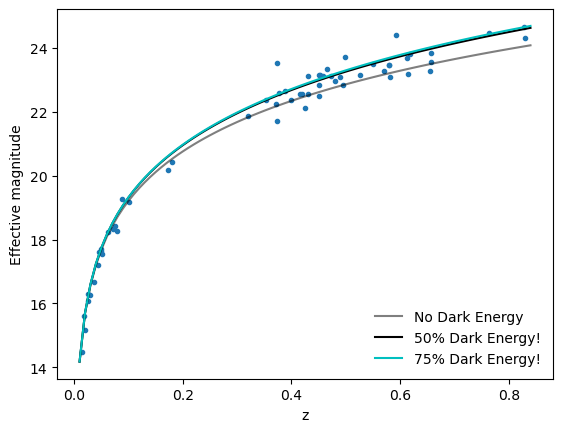

In [52]:
zs = np.arange(0.01, 0.85, 0.01)

pl.plot(dat['z'], dat['Effective magnitude'], marker='.', lw=0.0)

pl.plot(zs, effmag(zs, 0.0, 6.), c='k',   label='No Dark Energy', alpha=0.5)
pl.plot(zs, effmag(zs, 0.7, 6.), c='k',   label='50% Dark Energy!')
pl.plot(zs, effmag(zs, 0.751, 6.), c='c', label='75% Dark Energy!')

pl.xlabel('z')
pl.ylabel('Effective magnitude')

pl.legend(loc=4, frameon=False)

সুতরাং আমাদের মহাবিশ্বের ৭৫% কৃষ্ণশক্তি! এই পরিমাপটি করার প্রথম ব্যক্তি হিসাবে সল, ব্রায়ান স্মিডট এবং অ্যাডাম রিসকে তাদের কাজের জন্য ২০১১ সালের পদার্থবিজ্ঞানে নোবেল পুরষ্কার দেয়া হয়।

![title](../desihigh/images/perlmutter_nobel.jpg)

আপনি এখানে সমস্ত বিবরণ পেতে পারেন: https://arxiv.org/pdf/astro-ph/9812133.pdf। সতর্কতা বার্তা: এটি পেশাদার জ্যোতির্বিদদের জন্য তাই আপনি যদি বেশি কিছু না বুঝতে পারেন তবে ভয় পাবেন না।

DESI এর প্রাথমিক অনুপ্রেরণা হল অনুরূপ দূরবর্তী-লালসরণ পরিমাপকে আরও নিখুঁতভাবে পুনরাবৃত্তি করা এবং এই গোলমেলে কৃষ্ণশক্তি সম্পর্কে আরও অনেক কিছু জানা।